##### Problem definition

Build a multi-label model that’s capable of detecting different types of toxicity like severe toxic, threats, obscenity, insults, and so on

In [1]:
## importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset

df = pd.read_csv(r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Multi class classification\datasets\train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.shape

In [3]:
df_toxic = df.drop(['id','comment_text'], axis=1)
df_toxic.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [4]:
# Number of comments in each category

# [print(i,df[i].sum()) for i in df_toxic.columns.values]

counts = []
for i in df_toxic.columns.values:
#     print (i,'',df_toxic[i].sum())
    counts.append((i,df_toxic[i].sum()))

df_stats = pd.DataFrame(counts, columns = ['category', 'number_of_comments'])
df_stats.sort_values('number_of_comments', ascending = False, inplace=True)
df_stats

,category,number_of_comments
0,toxic,15294
2,obscene,8449
4,insult,7877
1,severe_toxic,1595
5,identity_hate,1405
3,threat,478


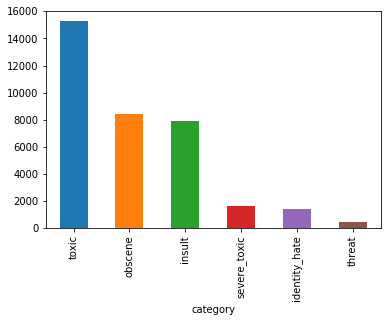

In [6]:
df_stats.plot(x = 'category', y = 'number_of_comments', kind = 'bar', legend = False)
plt.show()

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Text(0.5,0,'# of categories')

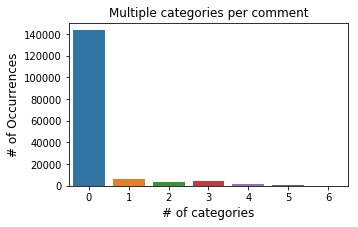

In [8]:
# How many comments have multi labels?

import seaborn as sns

rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
plt.figure(figsize=(5,3))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

# Vast majority of the comment text are not labeled.

In [9]:
print ('Percentage of comments that are not labelled')
print (
    round(
    len(
    df[
    (df['toxic'] == 0) 
    & (df['severe_toxic'] == 0) 
    & (df['obscene']==0) 
    & (df['threat']==0) 
    & (df['insult']==0) 
    & (df['identity_hate'] ==0)
    ]
) / len(df),3))

Percentage of comments that are not labelled
0.898


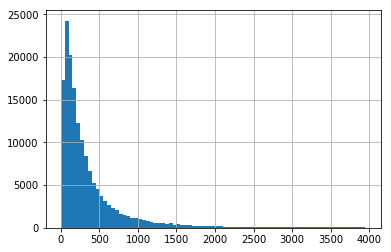

In [10]:
# The distribution of the number of words in comment texts

lens = df.comment_text.str.len()
lens.hist(bins = np.arange(0,4000,50))
plt.show()

# Most of the comment text length are within 500 characters, with some outliers up to 5,000 characters long

In [11]:
# Missing comment in the text

df.comment_text.isnull().sum()

0

In [12]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [13]:
# Data preprocessing

import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve'", "have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", "are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", "excuse ", text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\s+", " ", text)              # Eliminate duplicate whitespaces
    text = text.strip(' ')
    return text

In [14]:
df['comment_text_clean'] = df['comment_text'].map(lambda x:clean_text(x))

In [15]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [16]:
df['comment_text_clean'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27'

In [17]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can not make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [130]:
# X = df[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
# y = df['comment_text_clean']

In [18]:
df.columns.values

array(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'comment_text_clean'], dtype=object)

In [19]:
# split the data to train and test sets

from sklearn.model_selection import train_test_split
categories = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
train, test = train_test_split(df, random_state = 0, test_size = 0.33, shuffle = True)

X_train = train.comment_text_clean
X_test = test.comment_text_clean

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

print("The shape of the train: ",train.shape)
print("The shape of the test: ",test.shape)
print("The shape of the original dataset: ",df.shape)
print("The shape of the X_train: ",X_train.shape)
print("The shape of the X_test: ",X_test.shape)
# print("The shape of the y_train: ",y_train.shape)
# print("The shape of the y_test: ",y_test.shape)

The shape of the train:  (106912, 9)
The shape of the test:  (52659, 9)
The shape of the original dataset:  (159571, 9)
The shape of the X_train:  (106912,)
The shape of the X_test:  (52659,)


In [20]:
X_train.head()

117424    charges and sentences this article needs a cle...
90001     need your help seriously i recently voted to h...
35953     identities john burningham in another supposed...
97229     hey hi im kumarnator and im sort new to wiki i...
91713     preferences with all due respect hall is not n...
Name: comment_text_clean, dtype: object

In [21]:
X_test.head()

74251     i have not paraphrased you at all gary you com...
131406    i blocked revers i blocked revers i blocked re...
120969    i am sorry i would like to unreservedly retrac...
121827    i do not know if this is exactly like the pres...
4771      thank you all we will all improve the wikipedi...
Name: comment_text_clean, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

##### Classifiers Training
* Pipeline
Scikit-learn provides a pipeline utility to help automate machine learning workflows. Pipelines are very common in Machine Learning systems, since there is a lot of data to manipulate and many data transformations to apply. So we will utilize pipeline to train every classifier.

* OneVsRest multi-label strategy
The Multi-label algorithm accepts a binary mask over multiple labels. The result for each prediction will be an array of 0s and 1s marking which class labels apply to each row input sample.

##### Naive Bayes
OneVsRest strategy can be used for multi-label learning, where a classifier is used to predict multiple labels for instance. Naive Bayes supports multi-class, but we are in a multi-label scenario, therefore, we wrap Naive Bayes in the OneVsRestClassifier.

In [22]:
# Classifiers training

# Define a pipeline combining a text feature extractor with multi label classifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [23]:
NB_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf',OneVsRestClassifier(MultinomialNB(fit_prior=True,class_prior=None)))
])

In [24]:
for category in categories:
    print('...processing {}'.format(category))
    
    # Train the model using x_dtm and y
    NB_pipeline.fit(X_train,train[category])
       
    # Predict the data
    prediction = NB_pipeline.predict(X_test)
    
    # compute the testing accuracy
    print('Test accuracy is {}'.format(accuracy_score(test[category],prediction)))
    
    

...processing toxic
Test accuracy is 0.9200516530887408
...processing severe_toxic
Test accuracy is 0.989593421827228
...processing obscene
Test accuracy is 0.9527905960994322
...processing threat
Test accuracy is 0.9971324939706413
...processing insult
Test accuracy is 0.9520879621717085
...processing identity_hate
Test accuracy is 0.9908467688334378


##### LinearSVC

In [33]:
# LinearSVC

from sklearn.svm import LinearSVC
SVC_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words=stop_words)),
    ('clf',OneVsRestClassifier(LinearSVC(),n_jobs=1))
    ])

In [36]:
for category in categories:
    print('...processing {}'.format(category))
    
    # train the model
    SVC_pipeline.fit(X_train,train[category])
    
    # predict the data
    svc_prediction=SVC_pipeline.predict(X_test)
    
    # Accuracy
    print('Test accuracy is {}'.format(accuracy_score(test[category],svc_prediction)))

...processing toxic
Test accuracy is 0.9596460244212766
...processing severe_toxic
Test accuracy is 0.9897453426764655
...processing obscene
Test accuracy is 0.9792058337606108
...processing threat
Test accuracy is 0.9973413851383429
...processing insult
Test accuracy is 0.970641295884844
...processing identity_hate
Test accuracy is 0.9917772840350177


##### LogisticRegression

In [45]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LogReg_pipeline = Pipeline([
                            ('tfidf',TfidfVectorizer(stop_words=stop_words)),
                            ('clf',OneVsRestClassifier(LogisticRegression(solver='sag'),n_jobs=1))
                           ])

In [46]:
for category in categories:
    print('...processing {}'.format(category))
    
    # train the model
    LogReg_pipeline.fit(X_train,train[category])
    
    # predict the data
    LogReg_prediction=LogReg_pipeline.predict(X_test)
    
    # Accuracy
    print('Test accuracy is {}'.format(accuracy_score(test[category],LogReg_prediction)))

...processing toxic
Test accuracy is 0.955031428625686
...processing severe_toxic
Test accuracy is 0.9899732239503218
...processing obscene
Test accuracy is 0.9761294365635504
...processing threat
Test accuracy is 0.9972084543952601
...processing insult
Test accuracy is 0.9696158301524905
...processing identity_hate
Test accuracy is 0.9914354621242333


##### The three classifiers produced similar results. We have created a strong baseline for the toxic comment multi-label text classification problem

https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5